In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
sys.path.append('demo_python_backend_files')

# Animated demonstrations of gradient descent and Newton's method

In this notebook we provide several examples which demonstrate how two fundamental algorithms of mathematical optimmization work - gradient descent and Newton's method.  These algorithms are the workhorse of machine learning, and are introduced in Chapter 2 of the text along with their mathematical underpinning.  Several notebooks in this repository contain demonstrations of these algorithms applied to both supervised and unsupervised learning problems - including kernelized models and neural networks.

>The content of this notebook is supplementary material for Chapter 2 of the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

#  Demo 1: Gradient descent applied to a simple convex function with deceivingly difficult to hand-compute minimum  

In the next Python cell we plot the function 

$g(w) = w^4 + w^2 + 10w$

over a wide range of its input values.  This simple enough looking function is convex, and has a unique minimum.  However this minimum is virtually impossible to compute by hand.  Try employing the First Order Condition and set its derivative to zero, then try to solve for $w$.  Go ahead.  I dare you.

Instead of wasting reams of paper, a better option is to just to use an algorithm like gradient descent to find the minimum (or a close approximation to it).  As discussed in Chapter 2 of the text, gradient descent also solves the First Order Condition, only algorithmically.  

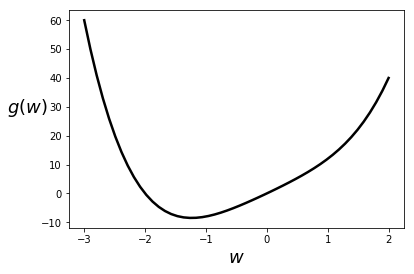

In [2]:
# plot the simple convex function
w = np.linspace(-3,2)
g = w**4 + w**2 + 10*w
fig = plt.figure(facecolor = 'white')
plt.plot(w,g,linewidth = 2.5,color = 'k')
plt.xlabel('$w$',fontsize = 18)
plt.ylabel('$g(w)$    ',rotation = 0,fontsize = 18)
plt.show()

In the next Python cell write out the gradient descent algorithm for minimizing this function.  All we need to do is compute the derivative - which here is Note that the here given as $g'(w) = 4w^3 + 2w + 10$ - and we are all set to go.

In [3]:
# the gradient descent algorithm for minimizing our simple but tricky function
def gradient_descent(w,alpha,max_its):
    w_history = []
    w_history.append(w)

    # start gradient descent loop
    for k in range(0,max_its):
        # calculate derivative (grad)
        grad = 4*(w**3) + 2*w + 10  
        
        # take gradient descent step
        w = w - alpha*grad

        # store weights at this iteration
        w_history.append(w)

    return w_history

Next, we run the gradient descent algorithm above.  Notice how at each step we save the current value of the input $w$.  This is so we can animate the process visually a few cells down.

In [4]:
# run gradient descent with chosen initial w = w0 and step length alpha
w_history = gradient_descent(w = -2.7, alpha = 0.01, max_its = 20)   

Finally, lets plot the gradient descent steps we just took with the function itself.  At each step we are going to plot the corresponding linear surrogate as well - to fully illustrate gradient descent.  This is explained in further detail in the Chapter.

Note a few things in particular about this animation.

1) We are slowing down the algorithm A TON so that each step can be visualized.  


2) The first few steps are drawn extra slowly with their corresponding tangent lines.  


3) The points are colored from green (the first few steps) to red (when the algorithm reaches the maximum number of iterations).

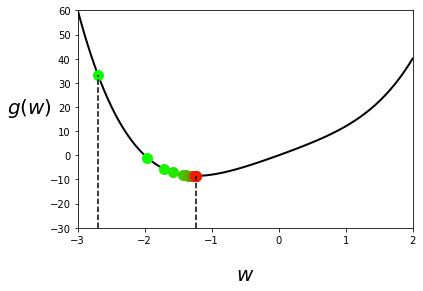

In [5]:
# plot all of the gradient descent steps evaluated at the cost function
from IPython import display            
import grad_descent_demo_convex as demo
demo.plot_steps_with_surrogate(w_history)
display.clear_output(wait=True)

You can try changing the step-size (value of alpha) and run both gradient descent and the animation again.  You can really mess up gradient descent if you make the step size too large or too small - so try it out!  Break this toy.

# Demo 2: Gradient descent applied to a simple nonconvex function with difficult to compute local minima

Lets now look at a simple nonconvex function that has some difficult to compute by-hand local minima.  

$g(w) = e^w\text{cos}(2\pi \text{sin}(\pi w))$

In the next Python cell we plot this function.

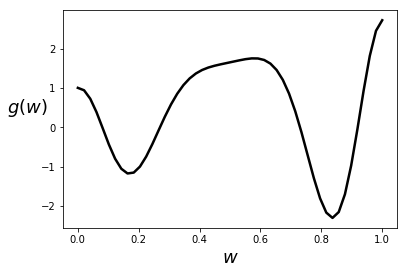

In [6]:
# plot the simple convex function
w = np.linspace(0,1)
g = np.exp(w)*np.cos(2*np.pi*np.sin(np.pi*w))
fig = plt.figure(facecolor = 'white')
plt.plot(w,g,linewidth = 2.5,color = 'k')
plt.xlabel('$w$',fontsize = 18)
plt.ylabel('$g(w)$    ',rotation = 0,fontsize = 18)
plt.show()

Gradient descent can be used to find minima of this nonconvnex cost functions (as well as nonconvex cost functions in machine learning like e.g., neural networks) as well.  All we need to do is compute the derivative of this function and we are off to the races.

In the next Python cell we have the gradient descent algorithm for minimizing this function.

In [7]:
# the gradient descent function
def gradient_descent(w,alpha,max_its):
    w_history = []
    w_history.append(w)

    # start gradient descent loop
    iter = 1
    for k in range(0,max_its):
        # calculate gradient (a single derivative in this case)
        grad = np.exp(w)*np.cos(2*np.pi*np.sin(np.pi*w)) - 2*np.pi**2*np.exp(w)*np.sin(2*np.pi*np.sin(np.pi*w))*np.cos(np.pi*w)
        
        # take gradient descent step
        w = w - alpha*grad

        # store weights at this iteration
        w_history.append(w)

    return w_history

Next, we run the gradient descent algorithm above.  Notice how at each step we save the current value of the input $w$.  This is so we can animate the process visually a few cells down.

In [8]:
# run the gradient descent function above
w_history = gradient_descent(w = 0.7, alpha = 0.001, max_its = 20)    

Finally, lets plot the gradient descent steps we just took with the function itself.  At each step we are going to plot the corresponding linear surrogate as well - to fully illustrate gradient descent.  This is explained in further detail in the Chapter.

Note a few things in particular about this animation.

1) We are slowing down the algorithm A TON so that each step can be visualized.  


2) The first few steps are drawn extra slowly with their corresponding tangent lines.  


3) The points are colored from green (the first few steps) to red (when the algorithm reaches the maximum number of iterations).

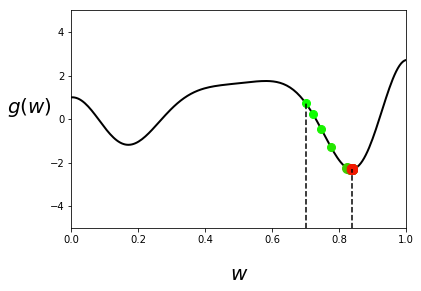

In [9]:
# plot all of the gradient descent steps evaluated at the cost function
from IPython import display            
import grad_descent_demo_nonconvex as demo
demo.plot_steps_with_surrogate(w_history)
display.clear_output(wait=True)

You can try changing the step-size (value of alpha) and run both gradient descent and the animation again.  You can really mess up gradient descent if you make the step size too large or too small - so try it out!  Break this toy.  Try moving around the initial point.  For example, can you get gradient descent stuck at a saddle point of the function?

#  Demo 3: Newton's method applied to our convex function

Now lets apply Newton's method to minimize the simple convex function - with deceptively difficult to compute by-hand global minimum - that we minimized above using gradient descent

$g(w) = w^4 + w^2 + 10w$

To use Newton's method all we need to do is compute the first derivative and second derivative of this function.  This is done quite easily, and in the next Python cell we have the Newton's method algorithm for this function.

In [10]:
def newtons_method(w,max_its):
    #initializations
    w_history = []
    w_history.append(w)

    #main loop
    for k in range(0,max_its):
        # form first and second derivatives (grad and hess, respectively)
        grad = 4*(w**3) + 2*w + 10  
        hess = 12*w**2 + 2
        
        # take step of Newton's method
        w = w - grad/hess

        #update containers
        w_history.append(w)

    return w_history

Next, we run the Newton's method algorithm above.  Notice how at each step we save the current value of the input $w$.  This is so we can animate the process visually a few cells down.

In [11]:
# run the Newton's method algorithm above for a given starting point w and max iterations max_iter
w_history = newtons_method(w = -2.5,max_its = 5)    

Finally, lets plot the Newton's method steps we just took with the function itself.  At each step we are going to plot the corresponding quadratic surrogate as well - to fully illustrate the method.  This is explained in further detail in the Chapter.

Note a few things in particular about this animation.

1) We are slowing down the algorithm A TON so that each step can be visualized.  


2) The first few steps are drawn extra slowly with their corresponding tangent quadratics.  


3) The points are colored from green (the first few steps) to red (when the algorithm reaches the maximum number of iterations).

Notice how it takes far fewer steps to reach the minimum using Newton's method than it generally did using gradient descent.

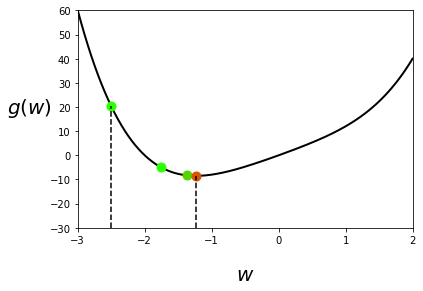

In [12]:
# plot all of the newton's method steps evaluated at the cost function
from IPython import display            
import newton_method_demo_convex as demo
demo.plot_steps_with_surrogate(w_history)
display.clear_output(wait=True)

# Demo 4: Newton's method applied to our nonconvex function

Lets now look at a apply Newton's method to minimize our nonconvex function

$g(w) = e^w\text{cos}(2\pi \text{sin}(\pi w))$

In the next Python cell we have the gradient descent algorithm for minimizing this function.

In [13]:
def newtons_method(w,max_its):
    #initializations
    w_history = []
    w_history.append(w)

    #main loop
    for k in range(0,max_its):
        # form first and second derivatives (grad and hess, respectively)
        grad =  np.exp(w)*np.cos(2*np.pi*np.sin(np.pi*w)) - 2*(np.pi**2)*np.exp(w)*np.sin(2*np.pi*np.sin(np.pi*w))*np.cos(np.pi*w)
        hess = np.exp(w)*(2*(np.pi**3)*np.sin(np.pi*w)*np.sin(2*np.pi*np.sin(np.pi*w)) - (4*np.pi**4)*(np.cos(np.pi*w)**2)*np.cos(2*np.pi*np.sin(np.pi*w)) + np.cos(2*np.pi*np.sin(np.pi*w)) - (4*np.pi**2)*np.sin(2*np.pi*np.sin(np.pi*w))*np.cos(np.pi*w))

        # take step of Newton's method
        w = w - grad/hess

        #update containers
        w_history.append(w)

    return w_history

Next, we run the Newton's method algorithm above.  Notice how at each step we save the current value of the input $w$.  This is so we can animate the process visually a few cells down.

In [14]:
# run the Newton's method algorithm above for a given starting point w and max iterations max_iter
w_history = newtons_method(w = 0.9,max_its = 5)    

Finally, lets plot the Newton's method steps we just took with the function itself.  At each step we are going to plot the corresponding quadratic surrogate as well - to fully illustrate the method.  This is explained in further detail in the Chapter.

Note a few things in particular about this animation.

1) We are slowing down the algorithm A TON so that each step can be visualized.  


2) The first few steps are drawn extra slowly with their corresponding tangent quadratics.  


3) The points are colored from green (the first few steps) to red (when the algorithm reaches the maximum number of iterations).

Notice how wild Newton's method can behave if it is not initialized near a local minimum of this function.  To see this in action change the initial point around and re-run the Newton's method and the cell below.  On concave portions of the function Newton's method will climb to a local maximum!  This behavior illustrates why applying Newton's method "right out of the box" - that is, without important adjustments - is typically not a good idea with nonconvex functions.

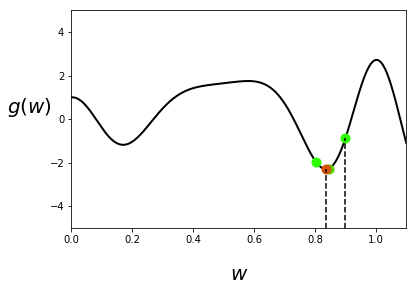

In [15]:
# plot all of the newton's method steps evaluated at the cost function
from IPython import display            
import newton_method_demo_nonconvex as demo
demo.plot_steps_with_surrogate(w_history)
display.clear_output(wait=True)